![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [171]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "flights2022.csv" CSV file as a pandas DataFrame and store the result in the flights_2022 variable
flights_2022 = pd.read_csv("flights2022.csv")

# Load the "flights_weather2022.csv" CSV file as a pandas DataFrame and store the result in the flights_weather_2022 variable
flights_weather_2022 = pd.read_csv("flights_weather2022.csv")

In [172]:
# Print the head of the flights_2022 DataFrame
print(flights_2022.head())

# Summarize the flights_2022 DataFrame
print(flights_2022.info())

   year  month  day  ...  minute             time_hour                airline
0  2022      1    1  ...      59  2022-01-01T23:00:00Z  United Air Lines Inc.
1  2022      1    1  ...      50  2022-01-01T22:00:00Z   Alaska Airlines Inc.
2  2022      1    1  ...      55  2022-01-01T23:00:00Z   Alaska Airlines Inc.
3  2022      1    1  ...      50  2022-01-01T23:00:00Z   Alaska Airlines Inc.
4  2022      1    1  ...      49  2022-01-01T23:00:00Z  United Air Lines Inc.

[5 rows x 20 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 no

In [173]:
# Print the head of the flights_weather_2022 DataFrame
print(flights_weather_2022.head())

# Summarize the flights_weather_2022 DataFrame
print(flights_weather_2022.info())

   year  month  day  dep_time  ...  wind_gust  precip  pressure  visib
0  2022      1    1       1.0  ...   9.270062     0.0    1022.9   10.0
1  2022      1    1       1.0  ...  10.594357     0.0    1023.4   10.0
2  2022      1    1      10.0  ...   9.270062     0.0    1022.9   10.0
3  2022      1    1      25.0  ...   9.270062     0.0    1022.9   10.0
4  2022      1    1      35.0  ...   7.945768     0.0    1025.1   10.0

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  11100

In [174]:
# Add a "route" column to the flights_2022 DataFrame concatenating the "origin" and "dest" columns
flights_2022["route"] = flights_2022["origin"] + "-" + flights_2022["dest"]

# Print the head of the newly modified flights_2022 DataFrame
print(flights_2022.head())

   year  month  day  ...             time_hour                airline    route
0  2022      1    1  ...  2022-01-01T23:00:00Z  United Air Lines Inc.  SEA-IAH
1  2022      1    1  ...  2022-01-01T22:00:00Z   Alaska Airlines Inc.  SEA-FAI
2  2022      1    1  ...  2022-01-01T23:00:00Z   Alaska Airlines Inc.  SEA-ATL
3  2022      1    1  ...  2022-01-01T23:00:00Z   Alaska Airlines Inc.  SEA-ORD
4  2022      1    1  ...  2022-01-01T23:00:00Z  United Air Lines Inc.  PDX-ORD

[5 rows x 21 columns]


In [175]:
# Group the flights_2022 DataFrame by the "route" column and aggregate by averaging the departure delays and counting the number of cancelled flights, and store the result in the routes_delayes_cancels variable
routes_delays_cancels = flights_2022.groupby("route").agg(mean_departure_delay = ("dep_delay", "mean"), total_cancellations = ("arr_time", lambda x: x.isna().sum())).reset_index()

# Print the head of the routes_delays_cancels DataFrame
print(routes_delays_cancels.head())

     route  mean_departure_delay  total_cancellations
0  PDX-ABQ              1.098039                    2
1  PDX-ANC              4.748936                    4
2  PDX-ATL              7.020979                   13
3  PDX-AUS              5.435374                    5
4  PDX-BOI              5.136430                    7


In [176]:
# Group the flights_2022 DataFrame by the "airline" column and aggregate by averaging the departure delays and counting the number of cancelled flights
airlines_delays_cancels = flights_2022.groupby("airline").agg(mean_departure_delay = ("dep_delay", "mean"), total_cancellations = ("arr_time", lambda x: x.isna().sum())).reset_index()

print(airlines_delays_cancels.head())

                  airline  mean_departure_delay  total_cancellations
0    Alaska Airlines Inc.              6.739282                 1342
1           Allegiant Air             26.608696                    6
2  American Airlines Inc.             20.129903                   85
3    Delta Air Lines Inc.             10.648634                  384
4  Frontier Airlines Inc.             14.355856                   12


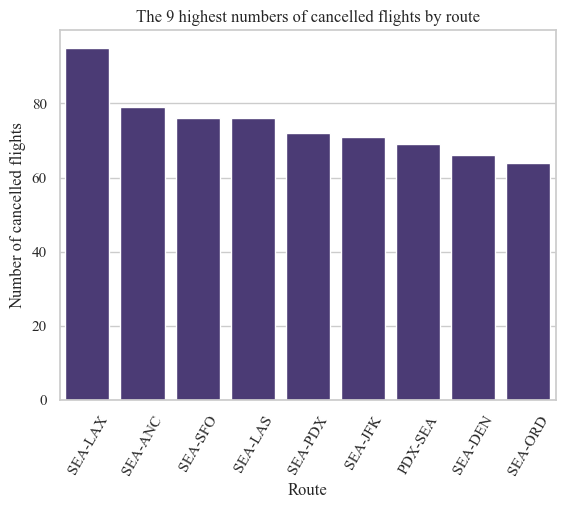

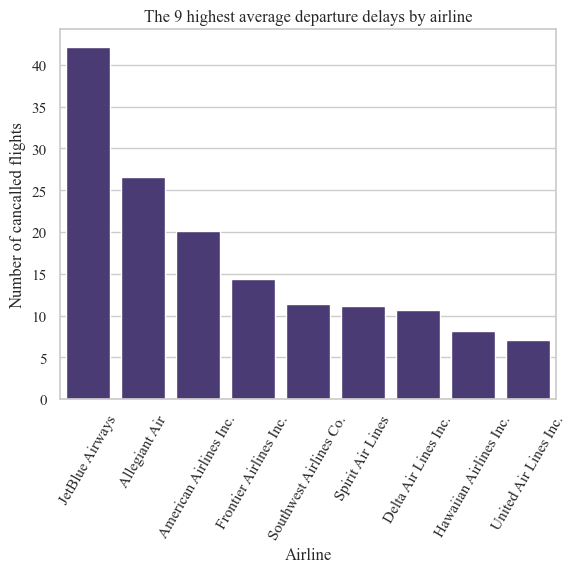

In [177]:
# Set the general style for the plots using seaborn
sns.set_theme(style = "whitegrid", palette = "viridis", font = "Times New Roman")

# Identify routes with the highest mean departure delays
top_routes_by_delay = airlines_delays_cancels.sort_values("mean_departure_delay", ascending=False).head(9)

# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

# Plot the top 9 highest numbers of flight cancellations by route and store the result in the top9_route_cancels_bar variable
top9_route_cancels_bar = sns.barplot(data = top_routes_by_cancellations, x = "route", y = "total_cancellations").set(xlabel = "Route", ylabel = "Number of cancelled flights", title = "The 9 highest numbers of cancelled flights by route")
plt.xticks(rotation = 60)
plt.show()

# Plot the top 9 highest numbers of flight cancellations by airline and store the result in the top9_airline_cancels_bar variable
top9_airline_cancels_bar = sns.barplot(data = top_routes_by_delay, x = "airline", y = "mean_departure_delay").set(xlabel = "Airline", ylabel = "Number of cancalled flights", title = "The 9 highest average departure delays by airline")
plt.xticks(rotation = 60)
plt.show()

In [178]:
# Cut the flights_weather_2022 DataFrame into two bins, one containing rows corresponding to wind gusts below 10 mph and another containing rows corresponding to wind gusts at 10 mph or more, and store the resulting pandas Series in a new "wind_speed_group" column in the flights_weather_2022 DataFrame
flights_weather_2022["wind_speed_group"] = pd.cut(flights_weather_2022["wind_gust"], bins = [0,10,np.inf], labels = ["Under 10 mph", "Above 10 mph"], ordered = True)

# Group the flights_weather_2022 DataFrame by "origin" and "wind_speed_group" and aggregate by averaging the "dep_delay" column and store the resulting DataFrame in the average_delays_origin_wind variable
average_delays_origin_wind = flights_weather_2022.groupby(["origin","wind_speed_group"]).agg(average_departure_delay = ("dep_delay", "mean"))

# Print the average_delays_origin_wind DataFrame
print(average_delays_origin_wind)

                         average_departure_delay
origin wind_speed_group                         
PDX    Under 10 mph                     6.750946
       Above 10 mph                     9.147024
SEA    Under 10 mph                     7.826007
       Above 10 mph                     9.231060


In [179]:
# Explicitly construct the wind_response variable as a boolean value which takes True if both destinations see an average departure delay increase due higher wind gust speeds, and False otherwise
wind_reponse = True